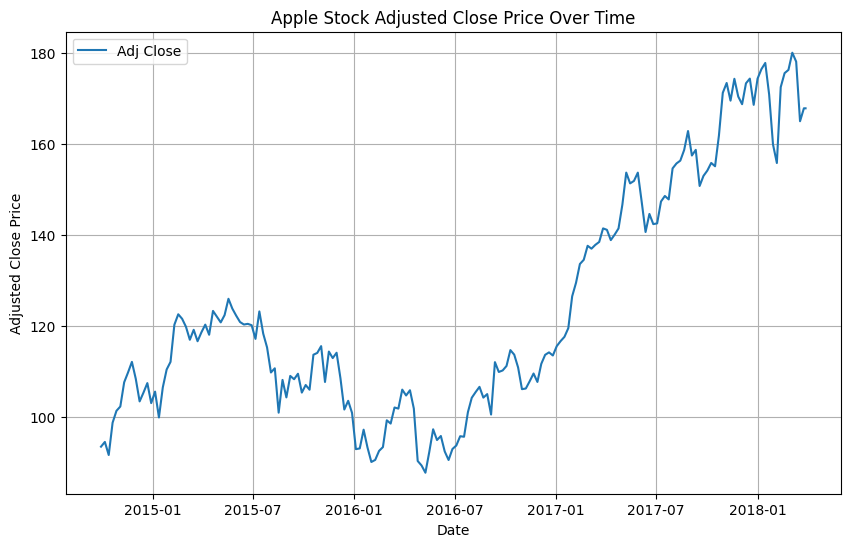

ADF Test Results:
ADF Statistic: -0.0875910526740771
p-value: 0.9506605719318454
Critical Values: {'1%': np.float64(-3.467845319799907), '5%': np.float64(-2.878011745497439), '10%': np.float64(-2.575551186759871)}
The series is likely non-stationary (p-value > 0.05).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "C:\\Users\\Lenovo\\Downloads\\apple_stock_prices.csv"
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date to ensure chronological order
data.sort_values('Date', inplace=True)

# Use 'Adj Close' for analysis
price_data = data['Adj Close'].copy()

# Handle missing values
price_data.fillna(price_data.mean(), inplace=True)

# Handle outliers using IQR
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
price_data = price_data[(price_data >= lower_bound) & (price_data <= upper_bound)]

# Plot the Adjusted Close Price Time Series
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adj Close')
plt.title('Apple Stock Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller (ADF) Test for Stationarity
result = adfuller(price_data.dropna())

# Print ADF Test Results
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

# Interpretation
if result[1] <= 0.05:
    print("The series is likely stationary (p-value <= 0.05).")
else:
    print("The series is likely non-stationary (p-value > 0.05).")
